In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

<div>
<img src="images/truemotion-logo.png" width="100%">
</div>
<br/>
<br/>
<div align="right">
<h2>Data Science Lunch Seminar:<br/>
    A/B Testing Theory and Practice</h2>
<h3>Nicholas Arcolano<br/>
    19 September 2016
</h3>
</div>

# What is an A/B test?
* Consider a random experiment with binary outcome
    * Coin flip, disease recovery, purchasing a product ("conversion")
* Assume there is some true "baseline" probability of a positive outcome
* We change something that (we think) will alter this baseline
* **How do we know if it actually did?**

* **Experiment!**
    * The original version is the **control** a.k.a. "variant A"
    * The new version is the **test** a.k.a. "variant B"

* **If A and B are "different enough", we decide our intervention had an effect—otherwise, we decide that it didn't**

# A "simple" example
* Consider two coins, with *unknown* probabilites of heads $p_1$ and $p_2$, and assume one of the following two hypotheses is true:
    * $H_0$ (null hypothesis): $p_1 = p_2$
    * $H_1$ (alternate hypothesis): $p_1 < p_2$
* How do we decide which is true?  
* Experiment!
    * Flip them both and see how different their outcomes are
    * Given $n$ flips of each coin, we will observe some number $m_1$ heads for coin #1 and $m_2$ heads for coin #2

* If we knew both distributions, we could just do the optimal thing prescribed by classical binary hypothesis testing—but this would require knowing $p_1$ and $p_2$
* Instead, we need some other **statistical test** that will take $n$, $m_1$, and $m_2$ and give us a number we can threshold to make a decision

# A review of statistical tests, errors, and power

* Basic approach to statistical testing:
    * Determine a **test statistic**: random variable that depends on $n$, $m_1$, and $m_2$
    * Want a statistic whose distribution **given the null hypothesis** is computable (exactly or approximately)
    * If the data we observe puts us in the tails of the distribution, we say that $H_0$ is too unlikely and **"reject the null hypothesis"** (choose $H_1$)
    * $p$-value: tail probability of the sampling distribution given the null hypothesis is true ($p$-value too small, reject the null)

* Often summarize the data as a 2 x 2 **contingency table**
<table witdth="100%">
<tr><td width="15%"></td> <td width="35%">Heads</td> <td width="35%">Tails</td> <td width="15%">Row totals</td></tr>
<tr><td>Coin #1</td> <td>$m_1$</td> <td>$n - m_1$</td> <td>$n$</td></tr>
<tr><td>Coin #2</td> <td>$m_2$</td> <td>$n - m_2$</td> <td>$n$</td></tr>
<tr><td>Column totals</td> <td>$m_1 + m_2$</td> <td>$2n - m_1 - m_2$</td> <td>$2n$</td></tr>
</table>
<br/>

* Statistical test takes this table and produces a $p$-value, which we then threshold (e.g. $p < 0.05$)

## Types of errors

* Four potential outcomes of the test:
    * $H_1$ is true, choose $H_1$: **true positive** (correct detection)
    * $H_0$ is true, choose $H_0$: **true negative** 
    * $H_0$ is true, choose $H_1$: **false positive** (Type I error)
    * $H_1$ is true, choose $H_0$: **false negative** (Type II error)

## Power and false positive rate
* Denote the probabilies of false positives and false negatives as $\alpha$ and $\beta$
* Since $p$-value represents the tail probability under the null, rejecting $p < \alpha$ corresponds to false positive rate of $\alpha$ (for a one-sided test)
* Refer to probability of correct detection $$\Pr\,(\text{choose}\ H_1\,|\,H_1\ \text{true}) = 1 - \beta$$ as the **power** of the test 

## Relationship to precision and recall

* Assume we do this test a large number of times, so that observed rates of success/failure represent true probabilities 
* Counts for each possible outcome $TP$, $TN$, $FP$, $FN$

* False alarm rate: $\alpha = \frac{FP}{FP + TN}$
* Recall (correct detection rate): $R = 1 - \beta = \frac{TP}{TP + FN}$
* Precision: $P = \frac{TP}{TP + FP}$

* We also have a **prior probability** for $H_1$
$$\pi = \frac{TP + FN}{TP + FN + TN + FP}$$

* Traditional hypothesis testing doesn't really take this into account

* The relationship between $\alpha$, $\beta$, precision and prior is given by
$$\alpha\,\frac{P}{1 - P} = (1-\beta)\,\frac{\pi}{1 - \pi}$$

* So, for a test with fixed power and false positive rate, **precision will scale with the prior probability of** $H_1$

# Examples of tests

## Fisher's exact test

* Observe that under the null, the row and column totals follow a **hypergeometric distribution**
* Reject the null if the differences between the row and column totals produces a $p$-value less than the given threshold
* "Exact test": doesn't need to hold only when $n$ is large
* Typically used when sample sizes are "small"
* Since distribution can only take on discrete values, can be conservative

## Pearson's chi-squared test
* Compare the observed frequencies of success $m_1/n$ and $m_2/n$
* If $H_0$ is true, then the variance of $m_1/n - m_2/n$ is
$$\sigma^2 = \frac{2\hat{\pi}(1 - \hat{\pi})}{n}$$
where 
$$\hat{\pi} = \frac{m_1 + m_2}{2n}$$
* The test statistic
$$z^2 = \frac{\left(m_1/n - m_2/n\right)^2}{\sigma^2}$$
under the null converges to a $\chi^2$ distribution
* Compute the chi-square tail probability of the test statistic, reject the null if it exceeds the threshold

# Back to our example

* Recall: 
    * $H_0$ (null hypothesis): $p_1 = p_2$
    * $H_1$ (alternate hypothesis): $p_1 < p_2$ 
* Assume we get to flip each coin $n = 100$ times, and let's look at some examples for each hypothesis

# Case #1: Alternate hypothesis is true

In [2]:
def plot(x, pmf1, pmf2):
    plt.figure(figsize=(16, 4))
    plt.plot(x, pmf1, 'ro:', alpha=0.5, label='Coin 1')
    plt.plot(x, pmf2, 'bo:', alpha=0.5, label='Coin 2')
    plt.xlabel('Number of heads')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

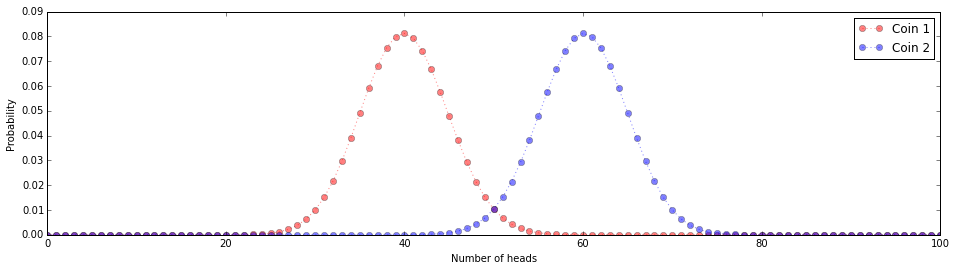

In [3]:
n = 100
p1 = 0.40
p2 = 0.60

# Compute distributions
x = np.arange(0, n+1)
pmf1 = stats.binom.pmf(x, n, p1)
pmf2 = stats.binom.pmf(x, n, p2)
plot(x, pmf1, pmf2)

In [4]:
# Example outcomes
m1, m2 = 40, 60
table = [[m1, n-m1], [m2, n-m2]]
chi2, pval, dof, expected = stats.chi2_contingency(table)
decision = 'reject H0' if pval < 0.05 else 'accept H0'
print('{} ({})'.format(pval, decision))

0.00720957076474 (reject H0)


In [5]:
m1, m2 = 43, 57
table = [[m1, n-m1], [m2, n-m2]]
chi2, pval, dof, expected = stats.chi2_contingency(table)
decision = 'reject H0' if pval < 0.05 else 'accept H0'
print('{} ({})'.format(pval, decision))

0.0659920550593 (accept H0)


# Case #2: Null hypothesis true

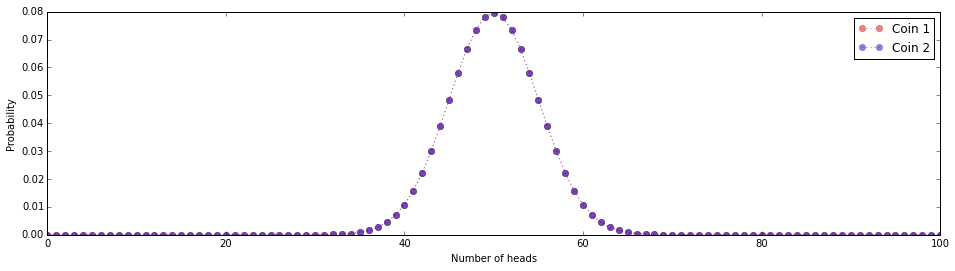

In [6]:
n = 100
p1 = 0.50
p2 = 0.50

# Compute distributions
x = np.arange(0, n+1)
pmf1 = stats.binom.pmf(x, n, p1)
pmf2 = stats.binom.pmf(x, n, p2)
plot(x, pmf1, pmf2)

In [7]:
# Example outcomes
m1, m2 = 49, 51
table = [[m1, n-m1], [m2, n-m2]]
chi2, pval, dof, expected = stats.chi2_contingency(table)
decision = 'reject H0' if pval < 0.05 else 'accept H0'
print('{} ({})'.format(pval, decision))

0.887537083982 (accept H0)


In [8]:
# Example outcomes
m1, m2 = 42, 58
table = [[m1, n-m1], [m2, n-m2]]
chi2, pval, dof, expected = stats.chi2_contingency(table)
decision = 'reject H0' if pval < 0.05 else 'accept H0'
print('{} ({})'.format(pval, decision))

0.0338948535247 (reject H0)


# Sample size calculation

* Often what we really want to know is: **how many flips to we need to reach a certain level of confidence that we are really observing a difference?**

## Factors affecting required sample size
* **Baseline probability** $p_1$: how often does anything interesting happen?
* **Minimum observable difference** that we want to be able to detect between $p_2$ and $p_1$
* Desired **power** of the test: if there is a real difference, how likely do we want to be to observe it?
* Desired **false positive rate** of the test

So in practice, if we have a good guess at $p_1$ and the minimum $p_2$ that we can accept detecting, we can estimate a minimum $n$

## Casagrande et al (1978)

Approximate formula gives the desired sample size $n$ as a function of $p_1$, $p_2$, $\alpha$, and $\beta$:
$$n = A \left[\frac{1 + \sqrt{1 + \frac{4(p_1 - p_2)}{A}}}{2(p_1 - p_2)}\right]^2$$
where $A$ is a $\chi^2$ "correction factor" given by  
$$A = \left[z_{1-\alpha} \sqrt{2\bar{p}(1 - \bar{p})} + z_{1 - \beta} \sqrt{p_1 (1-p_1) + p_2 (1-p_2)} \right]^2,$$
with $\bar{p} = (p_1+p_2)/2$ and where $z_p$ denotes the standard normal quantile function, i.e. $z_p = \Phi^{-1}(p)$ is location of the $p$-th quantile for $N(0, 1)$



## Example

In [9]:
p1, p2 = 0.40, 0.60
alpha = 0.05
beta = 0.05

# Evaluate quantile functions
p_bar = (p1 + p2)/2.0
za = stats.norm.ppf(1 - alpha/2)  # Two-sided test
zb = stats.norm.ppf(1 - beta)

# Compute correction factor
A = (za*np.sqrt(2*p_bar*(1-p_bar)) + zb*np.sqrt(p1*(1-p1) + p2*(1-p2)))**2

# Estimate samples required
n = A*(((1 + np.sqrt(1 + 4*(p1-p2)/A))) / (2*(p1-p2)))**2

print n

149.285261921


# A more practical (and scarier) example

* Assume we have 5.00% conversion on something we care about (e.g. click-through on a purchase page)
* We introduce a feature that we think will change conversions by 3% (i.e. from 5.00% to 5.15%)
* We want 95% power and 5% false positive rate

In [10]:
p1, p2 = 0.0500, 0.0515
alpha = 0.05
beta = 0.05

# Evaluate quantile functions
p_bar = (p1 + p2)/2.0
za = stats.norm.ppf(1 - alpha/2)  # Two-sided test
zb = stats.norm.ppf(1 - beta)

# Compute correction factor
A = (za*np.sqrt(2*p_bar*(1-p_bar)) + zb*np.sqrt(p1*(1-p1) + p2*(1-p2)))**2

# Estimate samples required
n = A*(((1 + np.sqrt(1 + 4*(p1-p2)/A))) / (2*(p1-p2)))**2

print n

555118.763831


So, for test and control combined we'll need at least $2n = $ **1.1 million users**. 

### Also, let's verify that this calculation even works...

In [11]:
n = 555119
n_trials = 10000

# Simulate experimental results when null is true
control0 = stats.binom.rvs(n, p1, size=n_trials)
test0 = stats.binom.rvs(n, p1, size=n_trials)  # Test and control are the same
tables0 = [[[a, n-a], [b, n-b]] for a, b in zip(control0, test0)]
results0 = [stats.chi2_contingency(T) for T in tables0]
decisions0 = [x[1] <= alpha for x in results0]
         
# Simulate Experimental results when alternate is true
control1 = stats.binom.rvs(n, p1, size=n_trials)
test1 = stats.binom.rvs(n, p2, size=n_trials)  # Test and control are different
tables1 = [[[a, n-a], [b, n-b]] for a, b in zip(control1, test1)]
results1 = [stats.chi2_contingency(T) for T in tables1]
decisions1 = [x[1] <= alpha for x in results1]

# Compute false alarm and correct detection rates
alpha_est = sum(decisions0)/float(n_trials)
power_est = sum(decisions1)/float(n_trials)

print('Theoretical false alarm rate = {:0.4f}, '.format(alpha) + 
      'empirical false alarm rate = {:0.4f}'.format(alpha_est))
print('Theoretical power = {:0.4f}, '.format(1 - beta) + 
      'empirical power = {:0.4f}'.format(power_est))

Theoretical false alarm rate = 0.0500, empirical false alarm rate = 0.0482
Theoretical power = 0.9500, empirical power = 0.9466


# What if _n_ is too big?

The main things influencing $n$ are
* How extreme $p_1$ is—very rare successes make it hard to reach significance
* The difference between $p_1$ and $p_2$—small differences are much harder to measure

What can we do if $n$ is too big to handle?
* Typically we won't mess with $\alpha$ and $\beta$ too much
* So, our only options are to adjust what we expect to get for $p_1$ and $p_2$ (i.e. change our minimum measurable effect)
* Or, we can try to increase $p_1$ by measuring something that is more common (e.g. clicks instead of purchases)

# Practical issues with A/B testing
* Sometimes it's hard to target the right group (e.g. email tests)
* It's easy to screw them up
    * Unexpected variations between control and test
    * Contamination between tests (test crossover)
    * Randomization issues (e.g. individuals vs groups)
* People (especially those outside of data science) are tempted to abuse them
    * Multiple testing
    * Searching for false positives

* Issue of prior probabilities
    * Can we know if a test is a "sure thing" or not?
    * If we did, then should we even be testing it?
    
* Overall, you can spend a lot of time and effort, especially if you want to measure small changes in rare phenomena

# Some alternatives to traditional A/B testing

### Multi-armed bandit theory
* Approaches for simultaneous exploration and exploitation
* Given a set of random experiments I could perform, how do I choose among them (in order and quantity)?
* Appropriate when you want to "earn while you learn"
* Good for quickly exploiting short windows of opportunity


![](images/multi-armed-bandit.png)

### Sequential testing
* In traditional testing ("fixed horizon"), we can't keep looking at the data as it comes in and then quit when we're successful, because we will inflate our false positive rate 
* Benjamin and Hochberg (1995) – approach to controlling false discovery rate for sequential measurements
* Likelihood ratio test that converges to the "true" false discovery rate over time
* This is what the [Optimizely](https://www.optimizely.com/) stats engine is built on

### Not actually testing
* We don't always need to A/B test
    * Testing requires engineering and data science resources
    * Potential upside (e.g. in terms of saved future effort or mitigation of risk) has to outweight the cost of developing, performing, and analyzing the test